## Exercise/Example: the biggest Earthquake in the UK this Century

### The Problem

GeoJSON is a json-based file format for sharing geographic data. One example dataset is the USGS earthquake data:

In [1]:
import requests
quakes = requests.get("http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
                      params={
                          'starttime': "2000-01-01",
                          "maxlatitude": "58.723",
                          "minlatitude": "50.008",
                          "maxlongitude": "1.67",
                          "minlongitude": "-9.756",
                          "minmagnitude": "1",
                          "endtime": "2021-01-19",
                          "orderby": "time-asc"}
                      )

In [2]:
quakes.text[0:100]

'{"type":"FeatureCollection","metadata":{"generated":1611065358000,"url":"https://earthquake.usgs.gov'

Your exercise: determine the location of the largest magnitude earthquake in the UK this century.

You'll need to:
* Get the text of the web result
* Parse the data as JSON
* Understand how the data is structured into dictionaries and lists
   * Where is the magnitude?
   * Where is the place description or coordinates?
* Program a search through all the quakes to find the biggest quake
* Find the place of the biggest quake
* Form a URL for an online map service at that latitude and longitude: look back at the introductory example
* Display that image

In [10]:
import json
raw_data = json.loads(quakes.text)  # OR quakes.json
raw_data

{'type': 'FeatureCollection',
 'metadata': {'generated': 1611065358000,
  'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2000-01-01&maxlatitude=58.723&minlatitude=50.008&maxlongitude=1.67&minlongitude=-9.756&minmagnitude=1&endtime=2021-01-19&orderby=time-asc',
  'title': 'USGS Earthquakes',
  'status': 200,
  'api': '1.10.3',
  'count': 128},
 'features': [{'type': 'Feature',
   'properties': {'mag': 2.6,
    'place': 'England, United Kingdom',
    'time': 956553055700,
    'updated': 1415322596133,
    'tz': None,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
    'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
    'felt': None,
    'cdi': None,
    'mmi': None,
    'alert': None,
    'status': 'reviewed',
    'tsunami': 0,
    'sig': 104,
    'net': 'us',
    'code': 'p0009rst',
    'ids': ',usp0009rst,',
    'sources': ',us,',
    'types': ',impact-text,origin,phase-data,',
    'n

In [12]:
raw_data.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [15]:
raw_data['type']

'FeatureCollection'

In [16]:
raw_data['metadata']

{'generated': 1611065358000,
 'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2000-01-01&maxlatitude=58.723&minlatitude=50.008&maxlongitude=1.67&minlongitude=-9.756&minmagnitude=1&endtime=2021-01-19&orderby=time-asc',
 'title': 'USGS Earthquakes',
 'status': 200,
 'api': '1.10.3',
 'count': 128}

In [24]:
raw_data['bbox']

[-6.04, 50.048, 0, 1.582, 58.204, 28.7]

In [30]:
quake_list = raw_data['features'] # this is the list of data
quake_list[0]

{'type': 'Feature',
 'properties': {'mag': 2.6,
  'place': 'England, United Kingdom',
  'time': 956553055700,
  'updated': 1415322596133,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 104,
  'net': 'us',
  'code': 'p0009rst',
  'ids': ',usp0009rst,',
  'sources': ',us,',
  'types': ',impact-text,origin,phase-data,',
  'nst': None,
  'dmin': None,
  'rms': None,
  'gap': None,
  'magType': 'ml',
  'type': 'earthquake',
  'title': 'M 2.6 - England, United Kingdom'},
 'geometry': {'type': 'Point', 'coordinates': [-2.81, 54.77, 14]},
 'id': 'usp0009rst'}

In [36]:
for x in quake_list[:5]:
    place = x['properties']['place']
    magnitude = x['properties']['mag']
    coordinates = x['geometry']['coordinates']
    
    print(f"{place}; magnitude: {magnitude}; {coordinates}")

England, United Kingdom; magnitude: 2.6; [-2.81, 54.77, 14]
England, United Kingdom; magnitude: 4; [-1.61, 52.28, 13.1]
North Sea; magnitude: 4; [1.564, 53.236, 10]
North Sea; magnitude: 3.3; [0.872, 58.097, 10]
England, United Kingdom; magnitude: 2.9; [-1.845, 51.432, 10]


In [40]:
# find the largest quake
max_magnitude = 0
max_long, max_lat = None, None

for x in quake_list:
    magnitude = x['properties']['mag']
    coordinates = x['geometry']['coordinates']
    
    if magnitude > max_magnitude:
        max_magnitude = magnitude
        max_lat, max_long = coordinates[1], coordinates[0]
        
print(max_magnitude, max_lat, max_long)

4.8 52.52 -2.15


In [55]:
import requests
def request_map_at(lat, long, satellite=True,
                   zoom=12, size=(400, 400)):
    base = "https://static-maps.yandex.ru/1.x/?"
  
    params = dict(
        z = zoom,
        size = str(size[0]) + "," + str(size[1]),
        ll = str(long) + "," + str(lat),
        l = "sat" if satellite else "map",
        lang = "en_US"
    )

    return requests.get(base,params=params)

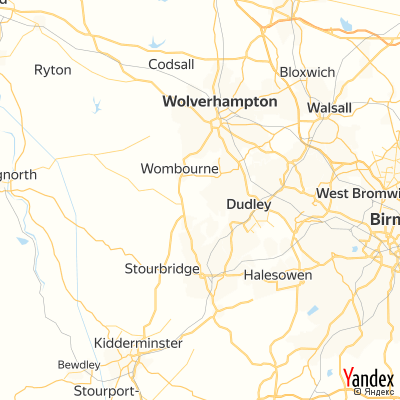

In [57]:
map_png = request_map_at(max_lat, max_long, satellite=False, zoom=10)
import IPython
IPython.core.display.Image(map_png.content)